In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()

mirror_images = tf.identity(train_images)
mirror_images = tf.image.flip_left_right(mirror_images)
mirror_images = tf.reshape(mirror_images, [60000, 28 * 28])
mirror_images = tf.cast(mirror_images, "float32") / 255

train_images = tf.reshape(train_images, [60000, 28 * 28])
train_images = tf.cast(train_images, "float32") / 255

test_images = train_images[:10000]
train_images = train_images[10000:]
mirror_images = mirror_images[10000:]

In [5]:
mirror_images.shape
# train_images.shape

TensorShape([50000, 784])

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(name="mnist_2_model")

model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(784))

model.summary()

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mse"])

Model: "mnist_2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 784)               402192    
                                                                 
Total params: 1,066,768
Trainable params: 1,066,768
Non-trainable params: 0
_________________________________________________________________


The train_images is trained to its mirror image in mirror_images with no activation function used. This means the output layer (784 nodes) is directly subtracted from the mirror image  to form the mean square error, which constitutes the objective function for the back propagation.

In [7]:
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2
    ),

    keras.callbacks.ModelCheckpoint(
        filepath="model1.keras",
        monitor="val_loss"
    ),

    keras.callbacks.TensorBoard(
        log_dir="."
    )
]

In [8]:
history = model.fit(
    train_images, mirror_images,
    epochs=50,
    callbacks=callback_list,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0510 - mse: 0.0510 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 2/50
313/313 [==============================] - 3s 8ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 8/50
313/313 [==============================] - 3s 9ms/step - loss: 0.

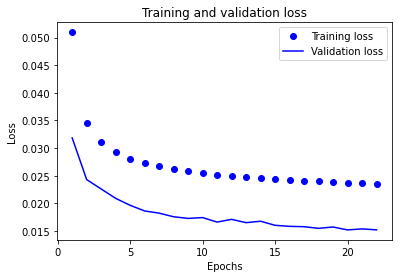

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
predictions = model.predict(test_images, batch_size=128)

79/79 [==============================] - 0s 2ms/step


In [11]:
predictions.shape

(10000, 784)

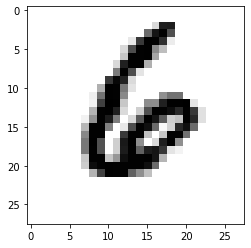

In [12]:
import matplotlib.pyplot as plt

digit = tf.reshape(test_images[13], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('test_images_145.png', bbox_inches='tight')

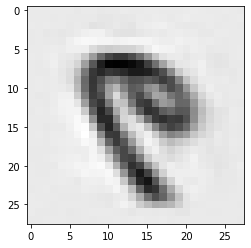

In [13]:
digit = tf.reshape(predictions[13], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('predictions_145.png', bbox_inches='tight')